<a href="https://colab.research.google.com/github/zhulkhoirr/Steam-Recommendation-System/blob/main/SteamRecommendationSystem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistem Rekomendasi Game Pada Platform Steam

## 1. Download Datasets Dari Kaggle

In [ ]:
from google.colab import files
files.upload()

In [2]:
!pip install -q kaggle

In [3]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

In [4]:
!chmod 600 ~/.kaggle/kaggle.json

In [5]:
!kaggle datasets download -d antonkozyriev/game-recommendations-on-steam

Dataset URL: https://www.kaggle.com/datasets/antonkozyriev/game-recommendations-on-steam
License(s): CC0-1.0
100% 660M/660M [00:09<00:00, 68.8MB/s]
100% 660M/660M [00:09<00:00, 70.7MB/s]


In [6]:
!unzip -q game-recommendations-on-steam.zip

## 2. EDA

In [7]:
import numpy as np
import pandas as pd

In [8]:
games_df = pd.read_csv('games.csv')

games_df.sample(5)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
11899,431180,WolfQuest: Classic,2016-03-25,True,True,False,Very Positive,91,1315,19.99,19.99,0.0,True
37374,1373180,The Sea Hotel☆Umineko Tei,2020-09-30,True,False,False,Positive,83,48,6.99,6.99,0.0,True
17909,1096100,Skellboy Refractured,2021-01-13,True,True,True,Positive,80,45,19.99,19.99,0.0,True
38376,352184,FSX: Steam Edition - Inverness Airport (EGPE) ...,2015-07-08,True,False,False,Mixed,53,15,16.99,16.99,0.0,True
48655,1388850,Sid Meier's Civilization® VI: Babylon Pack,2020-11-19,True,True,True,Mixed,62,116,4.99,4.99,0.0,True


In [9]:
len(games_df)

50872

In [10]:
sort_games_df = games_df.sort_values(by='user_reviews', ascending=False)

sort_games_df.head(10)

,app_id,title,date_release,win,mac,linux,rating,positive_ratio,user_reviews,price_final,price_original,discount,steam_deck
14398,730,Counter-Strike: Global Offensive,2012-08-21,True,True,True,Very Positive,88,7494460,15.0,0.0,0.0,True
47770,578080,PUBG: BATTLEGROUNDS,2017-12-21,True,False,False,Mixed,57,2217226,0.0,0.0,0.0,True
13176,570,Dota 2,2013-07-09,True,True,True,Very Positive,82,2045628,0.0,0.0,0.0,True
12717,271590,Grand Theft Auto V,2015-04-13,True,False,False,Very Positive,86,1484122,0.0,0.0,0.0,True
14535,359550,Tom Clancy's Rainbow Six® Siege,2015-12-01,True,False,False,Very Positive,86,993312,20.0,0.0,0.0,True
47380,440,Team Fortress 2,2007-10-10,True,True,True,Very Positive,93,985819,0.0,0.0,0.0,True
13035,105600,Terraria,2011-05-16,True,True,True,Overwhelmingly Positive,97,943413,10.0,0.0,0.0,True
15363,4000,Garry's Mod,2006-11-29,True,True,True,Overwhelmingly Positive,96,853733,10.0,0.0,0.0,True
13173,252490,Rust,2018-02-08,True,True,False,Very Positive,87,786668,40.0,0.0,0.0,True
14376,1172470,Apex Legends™,2020-11-04,True,False,False,Very Positive,80,713182,0.0,0.0,0.0,True


In [11]:
users_df = pd.read_csv('users.csv')

users_df.sample(5)

,user_id,products,reviews
3816245,5546761,2,1
1460398,6265625,30,2
13694305,7354648,72,9
8637173,13455785,246,7
6587848,9004090,471,1


In [12]:
recommendations_df = pd.read_csv('recommendations.csv')

recommendations_df.sample(5)

,app_id,helpful,funny,date,is_recommended,hours,user_id,review_id
23638208,285900,0,0,2022-02-07,True,21.9,12909020,23638208
2236767,394360,0,0,2016-11-24,True,88.2,4694586,2236767
28627876,1043180,0,0,2019-04-06,True,2.2,13480036,28627876
39026432,1641270,0,0,2022-04-24,True,138.0,10192377,39026432
11674534,35450,4,0,2018-06-25,True,138.8,1998849,11674534


In [41]:
import json

with open('games_metadata.json', 'r') as file:
    data = file.read()

json_objects = data.split('\n')

data_list = []
for obj in json_objects:
    if obj.strip():
        data_list.append(json.loads(obj))

games_metadata_df = pd.DataFrame(data_list)
games_metadata_df['tags'] = games_metadata_df['tags'].apply(lambda x: ', '.join(x) if isinstance(x, list) else x)
games_metadata_df.sample(5)


,app_id,description,tags
6661,32160,Bowl or Beware! From the depths of the graveya...,"Bowling, Zombies, Casual, Sports, Singleplayer..."
49439,2229260,The return of classic MMORPG ! Global Direct O...,"MMORPG, Action RTS, PvE, PvP, Exploration, Act..."
31669,688660,All young naval officers dream of becoming Adm...,"Strategy, Naval Combat, Naval, Management, Rea..."
1471,1432750,Chionophile is a very short experience about t...,"Experimental, Exploration, Walking Simulator, ..."
26767,368470,GeoVox is the latest application by Axis Game ...,"Software Training, Animation & Modeling, Utili..."


## 3. Mempersiapkan Data

In [14]:
recommendations_df = pd.read_csv('recommendations.csv', usecols=['app_id', 'is_recommended', 'user_id', 'hours'])

recommendations_df.head(5)

,app_id,is_recommended,hours,user_id
0,975370,True,36.3,51580
1,304390,False,11.5,2586
2,1085660,True,336.5,253880
3,703080,True,27.4,259432
4,526870,True,7.9,23869


In [15]:
hours_count = recommendations_df[recommendations_df['hours'] == 0.0].count()

print(f"Jumlah nilai 0.0 di kolom 'hours': {hours_count['hours']}")

Jumlah nilai 0.0 di kolom 'hours': 176329


In [16]:
recommendations_df = recommendations_df[recommendations_df['hours'] != 0.0]

In [17]:
zero_hours_count = (recommendations_df['hours'] == 0.0).sum()

print(f"Jumlah nilai 0.0 di kolom 'hours': {zero_hours_count}")

Jumlah nilai 0.0 di kolom 'hours': 0


In [18]:
n_recommendations = recommendations_df['user_id'].value_counts()
print(n_recommendations)

user_id
11764552    5652
5112758     3657
11656130    3648
5669734     3479
11553593    3118
            ... 
5586939        1
4497103        1
2719342        1
7185639        1
2306695        1
Name: count, Length: 13760373, dtype: int64


In [19]:
n_recommendations = recommendations_df['user_id'].value_counts()
recommendations_df = recommendations_df[recommendations_df['user_id'].isin(n_recommendations[n_recommendations >=50].index)].copy()
recommendations_df.head(5)

,app_id,is_recommended,hours,user_id
58,602960,True,41.9,737481
138,570940,False,73.3,5136277
151,1196590,True,19.0,5935019
203,304390,False,42.5,10567745
209,244850,True,540.7,11143713


In [20]:
print("Jumlah duplikasi:",  recommendations_df.duplicated().sum())

Jumlah duplikasi: 1


In [21]:
recommendations_df.drop_duplicates(inplace=True)
print("Jumlah duplikasi:",  recommendations_df.duplicated().sum())

Jumlah duplikasi: 0


In [22]:
recommendations_df.isnull().sum()

app_id            0
is_recommended    0
hours             0
user_id           0
dtype: int64

In [23]:
recommendations_df['is_recommended'] = recommendations_df['is_recommended'].astype(int)

## 4. Preprocessing Data

In [24]:
user_ids = recommendations_df['user_id'].unique().tolist()
user2user_encoded = {x:i for i, x in enumerate(user_ids)}
user_encoded2user = {i:x for i, x in enumerate(user_ids)}
recommendations_df['user'] = recommendations_df['user_id'].map(user2user_encoded)
n_users = len(user2user_encoded)

app_ids = recommendations_df['app_id'].unique().tolist()
app2app_encoded = {x:i for i, x in enumerate(app_ids)}
app_encoded2app = {i:x for i, x in enumerate(app_ids)}
recommendations_df['app'] = recommendations_df['app_id'].map(app2app_encoded)
n_app  = len(app2app_encoded)

print("Jumlah user: {}, Jumlah game: {}".format(n_users, n_app))

Jumlah user: 36646, Jumlah game: 36028


In [25]:
recommendations_df

,app_id,is_recommended,hours,user_id,user,app
58,602960,1,41.9,737481,0,0
138,570940,0,73.3,5136277,1,1
151,1196590,1,19.0,5935019,2,2
203,304390,0,42.5,10567745,3,3
209,244850,1,540.7,11143713,4,4
...,...,...,...,...,...,...
41154764,1818450,1,1.0,13261742,24873,991
41154770,700600,1,2.0,6382076,35046,2837
41154771,362960,1,35.0,7858713,21437,3024
41154784,633230,0,20.0,8107668,18148,2391


In [26]:
recommendations_df = recommendations_df.sample(frac=1, random_state=46)

X = recommendations_df[['user', 'app']].values
y = recommendations_df['is_recommended']

In [27]:
X

array([[ 8127,    52],
       [ 5147, 27858],
       [ 6385,  2674],
       ...,
       [30719,  1078],
       [ 7675,   401],
       [23746, 25712]])

In [28]:
y

13131890    1
35625112    1
16695870    1
14523913    1
6006244     1
           ..
3402980     0
36455208    1
9328930     0
19537234    1
36598476    0
Name: is_recommended, Length: 3376881, dtype: int64

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=20)

print("Train set is_recommended: {}".format(len(y_train)))
print("Test set is_recommended: {}".format(len(y_test)))

Train set is_recommended: 2701504
Test set is_recommended: 675377


In [30]:
X_train

array([[29438,  3890],
       [ 3727, 23255],
       [   55,   745],
       ...,
       [  991, 27745],
       [35784, 27875],
       [25174,  1776]])

In [31]:
X_train[:, 0]

array([29438,  3727,    55, ...,   991, 35784, 25174])

In [32]:
X_train_array = [X_train[:, 0], X_train[:, 1]]
X_test_array = [X_test[:, 0], X_test[:, 1]]

In [33]:
X_train_array

[array([29438,  3727,    55, ...,   991, 35784, 25174]),
 array([ 3890, 23255,   745, ..., 27745, 27875,  1776])]

## 5. Membuat Model

In [34]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, Embedding, Flatten, Concatenate, Dense, Dropout, Dot, BatchNormalization

def RecommenderNet(n_users, n_app, embedding_size=32):
  user_input = Input(shape=(1), name='user')
  user_embedding = Embedding(n_users, embedding_size, name='user_embedding')(user_input)
  app_input = Input(shape=(1), name='app')
  app_embedding = Embedding(n_app, embedding_size, name='app_embedding')(app_input)

  # concatenate = Concatenate(name='concatenate')([user_vec, app_vec])
  dot = Dot(axes=1, normalize=True, name='dot')([user_embedding, app_embedding])
  flatten = Flatten(name='flatten')(dot)

  dense = Dense(128, activation='relu', name='dense')(flatten)
  dropout = Dropout(0.4, name='dropout')(dense)
  batch_norm = BatchNormalization(name='batch_norm')(dropout)
  output = Dense(1, activation='sigmoid', name='output')(batch_norm)

  model = Model([user_input, app_input], output)
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['mae', 'mse'])

  return model

model = RecommenderNet(n_users, n_app)

model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 user (InputLayer)           [(None, 1)]                  0         []                            
                                                                                                  
 app (InputLayer)            [(None, 1)]                  0         []                            
                                                                                                  
 user_embedding (Embedding)  (None, 1, 32)                1172672   ['user[0][0]']                
                                                                                                  
 app_embedding (Embedding)   (None, 1, 32)                1152896   ['app[0][0]']                 
                                                                                              

In [35]:
history = model.fit(
    x=X_train_array,
    y=y_train,
    epochs=15,
    batch_size=10000,
    validation_data=(X_test_array, y_test)
)

Epoch 1/15
271/271 [==============================] - 116s 420ms/step - loss: 0.5741 - mae: 0.3707 - mse: 0.1914 - val_loss: 0.4925 - val_mae: 0.3211 - val_mse: 0.1567
Epoch 2/15
271/271 [==============================] - 107s 396ms/step - loss: 0.4952 - mae: 0.3164 - mse: 0.1576 - val_loss: 0.4890 - val_mae: 0.3114 - val_mse: 0.1556
Epoch 3/15
271/271 [==============================] - 113s 417ms/step - loss: 0.4887 - mae: 0.3111 - mse: 0.1554 - val_loss: 0.4878 - val_mae: 0.3107 - val_mse: 0.1552
Epoch 4/15
271/271 [==============================] - 115s 424ms/step - loss: 0.4864 - mae: 0.3095 - mse: 0.1546 - val_loss: 0.4866 - val_mae: 0.3074 - val_mse: 0.1548
Epoch 5/15
271/271 [==============================] - 110s 408ms/step - loss: 0.4843 - mae: 0.3079 - mse: 0.1539 - val_loss: 0.4855 - val_mae: 0.3082 - val_mse: 0.1544
Epoch 6/15
271/271 [==============================] - 119s 438ms/step - loss: 0.4827 - mae: 0.3069 - mse: 0.1534 - val_loss: 0.4846 - val_mae: 0.3061 - val_mse:

In [36]:
loss, mae, mse = model.evaluate(X_test_array, y_test)

print(f'Loss: {loss}, MAE: {mae}, MSE: {mse}')

21106/21106 [==============================] - 64s 3ms/step - loss: 0.4803 - mae: 0.3003 - mse: 0.1526
Loss: 0.4803163707256317, MAE: 0.30031976103782654, MSE: 0.15256968140602112


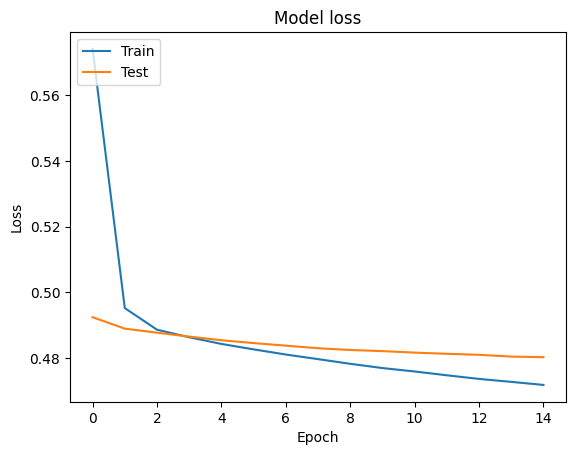

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [38]:
model.save('model/model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


## Metadata Game Steam

In [ ]:
def get_app_name(app_id):
  try:
    name = games_df[games_df.app_id == app_id]